# Customer Analysis Round 2

### Importing files

In [1]:
import pandas as pd
import numpy as np

In [2]:
mca_data = pd.read_csv('../lab-customer-analysis-round-7/files_for_lab/csv_files/marketing_customer_analysis.csv')

### DF shape

In [3]:
#Showing the dataframe shape.
print(mca_data.shape)
mca_data.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Header names

In [4]:
#Standardizing header names with lower cases and underscores.
mca_data.columns= mca_data.columns.str.lower()
mca_data.columns = mca_data.columns.str.replace(" ", "_")
mca_data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
#Checking data types for all the columns in a dataframe
mca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### Which columns are numerical?

###### "customer_lifetime_value", "income", "monthly_premium_auto", "months_since_last_claim", "months_since_policy_inception", "number_of_open_complaints", "number_of_policies", "total_claim_amount" are numerical columns.

### Which columns are categorical?

"customer", "state", "responce", "coverage", "education", "effective_to_date", "employmentstatus", "gender", "location_code", "marital_status", "policy_type", "policy", "renew_offer_type", "sales_channel", "vehicle_class", "vehicle_size", "vehicle_type" 

### NaN values.

In [6]:
round(mca_data.isna().sum()/len(mca_data),4)*100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

There are 7 variables with some number of missing values.

1.For the numerical variables ("months since last claim" amd "number of open complaints") I will use the mean of the column.

2.For the categorical variables like "state", "response", "vehicle_class" and "vehicle_size" I will use the mode.

3.And I will drop the column "vehicle type" because the % of missing values is more than 50%, and this information might be retrieved from the other columns.

Missing values for numerical columns

In [7]:
# Calculating mean for "months since last claim" and filling NaNs with this value
mean_months_since_last_claim = mca_data['months_since_last_claim'].mean()
print("Mean months since last claim is:",mean_months_since_last_claim)
mca_data['months_since_last_claim'] = mca_data['months_since_last_claim'].fillna(mean_months_since_last_claim)

# Calculating mean for "months since last claim" and filling NaNs with this value
mean_number_of_open_complaints = mca_data['number_of_open_complaints'].mean()
print("Mean number of open complaints is:",mean_number_of_open_complaints)
mca_data['number_of_open_complaints'] = mca_data['number_of_open_complaints'].fillna(mean_number_of_open_complaints)

Mean months since last claim is: 15.097000218962119
Mean number of open complaints is: 0.38438800087584846


Missing values for categorical columns

In [8]:
# Defining the mode for the categorical columns
print(mca_data["state"].mode()[0])
print(mca_data["response"].mode()[0])
print(mca_data["vehicle_class"].mode()[0])
print(mca_data["vehicle_size"].mode()[0])

California
No
Four-Door Car
Medsize


In [9]:
# Filling NaNs with the most popular value of the column
mca_data['state'] = mca_data['state'].fillna('California')
mca_data['response'] = mca_data['response'].fillna('No')
mca_data['vehicle_class'] = mca_data['vehicle_class'].fillna('Four-Door Car')
mca_data['vehicle_size'] = mca_data['vehicle_size'].fillna('Medsize')

Dropping "vehicle type" column

In [11]:
mca_data = mca_data.drop(["vehicle_type"], axis=1)

In [12]:
# Double-checking missing values presence.
round(mca_data.isna().sum()/len(mca_data),4)*100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

### Datetime formating

In [13]:
#Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , ie. January, February and March. #
#Hint: If data from March does not exist, consider only January and February.

In [14]:
import datetime

# changing dtype of "effective to date" column to datetime. And creating a new column to extract the month number.
mca_data["effective_to_date"] = pd.to_datetime(mca_data['effective_to_date'], errors='coerce')
mca_data["effective_to_month"] = mca_data['effective_to_date'].dt.month

# checking values for the new column
mca_data['effective_to_month'].value_counts()

1    4898
2    4236
Name: effective_to_month, dtype: int64

We only have January and February in the dataset, therefore we do not need to filter it - it already contains only Q1

### BONUS: Put all the previously mentioned data transformations into a function.

In [15]:
# Here is a function to standardize column names, but I can´t find a way to briefly put all the other 
# data transformations in a function

def data_transformation(mca_data):
    mca_data.columns = mca_data.columns.str.lower().str.replace(' ', '_')
    return mca_data
    
mca_data = data_transformation(mca_data)
print(mca_data.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'effective_to_month'],
      dtype='object')


# Customer Analysis Round 3

### Show DataFrame info.

In [16]:
mca_data.info()
mca_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


### Describe DataFrame.

In [17]:
mca_data.describe(include="all").T

C:\Users\Kate\AppData\Local\Temp\ipykernel_22608\471723989.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mca_data.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
customer,9134,9134,BU79786,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,9134,5,California,3150,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,9134.0,NaN,NaN,NaN,NaT,NaT,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
response,9134,2,No,7826,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9134,3,Basic,5568,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9134,5,Bachelor,2748,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_to_date,9134,59,2011-01-10 00:00:00,195,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,9134,5,Employed,5698,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9134,2,F,4658,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9134.0,NaN,NaN,NaN,NaT,NaT,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


## Plots

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Show a plot of the total number of responses.

[Text(0.5, 1.0, 'Total number of responses by type')]

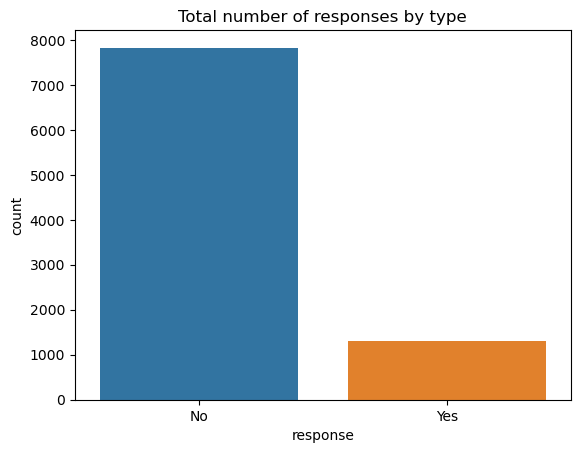

In [19]:
sns.countplot(data=mca_data, x="response").set(title='Total number of responses by type')

### Show a plot of the response rate by the sales channel.

[Text(0.5, 1.0, 'Total number of responses by sales channel')]

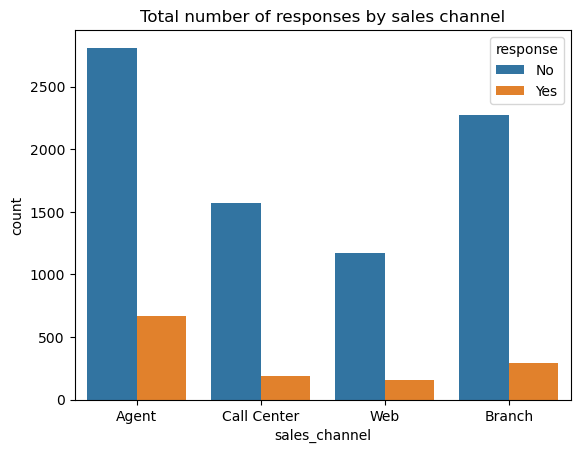

In [20]:
sns.countplot(data=mca_data, x="sales_channel", hue="response").set(title='Total number of responses by sales channel')


### Show a plot of the response rate by the total claim amount and income

I think that for the next 2 plots I need to create categorical extra-columns with the ranking for the requested variables.

To understand the variables "total_claim_amount" and "income" I will describe the dataset.

In [21]:
mca_data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


I will use the values from 25%, 50% and 75% to create the ranking for these variables.

### Show a plot of the response rate by total claim amount.

In [22]:
# Creating a column with the grading for total_claim_amount

condition = [
    (mca_data["total_claim_amount"]<272),
    (mca_data["total_claim_amount"]>=272) & (mca_data["total_claim_amount"]<384),
    (mca_data["total_claim_amount"]>=384) & (mca_data["total_claim_amount"]<548),
    (mca_data["total_claim_amount"]>=548)
]

tca_level =["very low", "low", "medium", "high"]
mca_data['tca_level'] = np.select(condition, tca_level)        

[Text(0.5, 1.0, 'Total number of responses by total claim amount')]

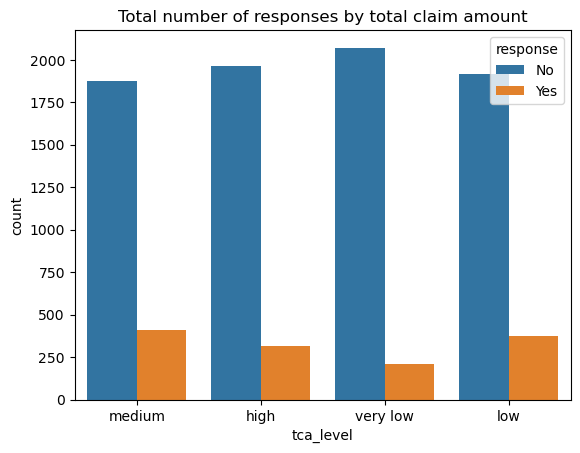

In [23]:
sns.countplot(data=mca_data, x="tca_level", hue="response").set(title='Total number of responses by total claim amount')

### Show a plot of the response rate by income.

In [24]:
# Creating a column with the grading for income

condition1 = [
    (mca_data["income"]<=0),
    (mca_data["income"]>0) & (mca_data["income"]<=33890),
    (mca_data["income"]>33890) & (mca_data["income"]<=62320),
    (mca_data["income"]>62320)
]

income_level =["no income", "low", "medium", "high"]
mca_data['income_level'] = np.select(condition1, income_level)  

[Text(0.5, 1.0, 'Total number of responses by income')]

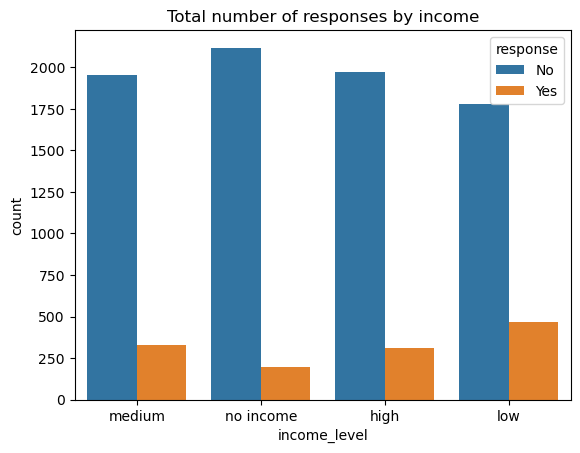

In [25]:
sns.countplot(data=mca_data, x="income_level", hue="response").set(title='Total number of responses by income')

# Customer Analysis Round 4

In [26]:
# Importing the functions
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns 
# in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and 
# categorical data types respectively)

In [28]:
mca_data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [29]:
# Before creating new dfs for numerical and categorical columns, I drop the columns created in a previous exercise
mca_data = mca_data.drop(["tca_level", "income_level", "effective_to_month"], axis=1)

In [30]:
mca_data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [31]:
# Spliting the dataset
numerical_columns = mca_data.select_dtypes(include = np.number)
categorical_columns = mca_data.select_dtypes(include = "object").drop(["customer"], axis=1)

In [32]:
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [33]:
categorical_columns.describe().T

,count,unique,top,freq
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298
policy_type,9134,3,Personal Auto,6788
policy,9134,9,Personal L3,3426


In [34]:
# Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables
# Use Matplotlib to construct histograms
# Do the distributions for different numerical variables look like a normal distribution

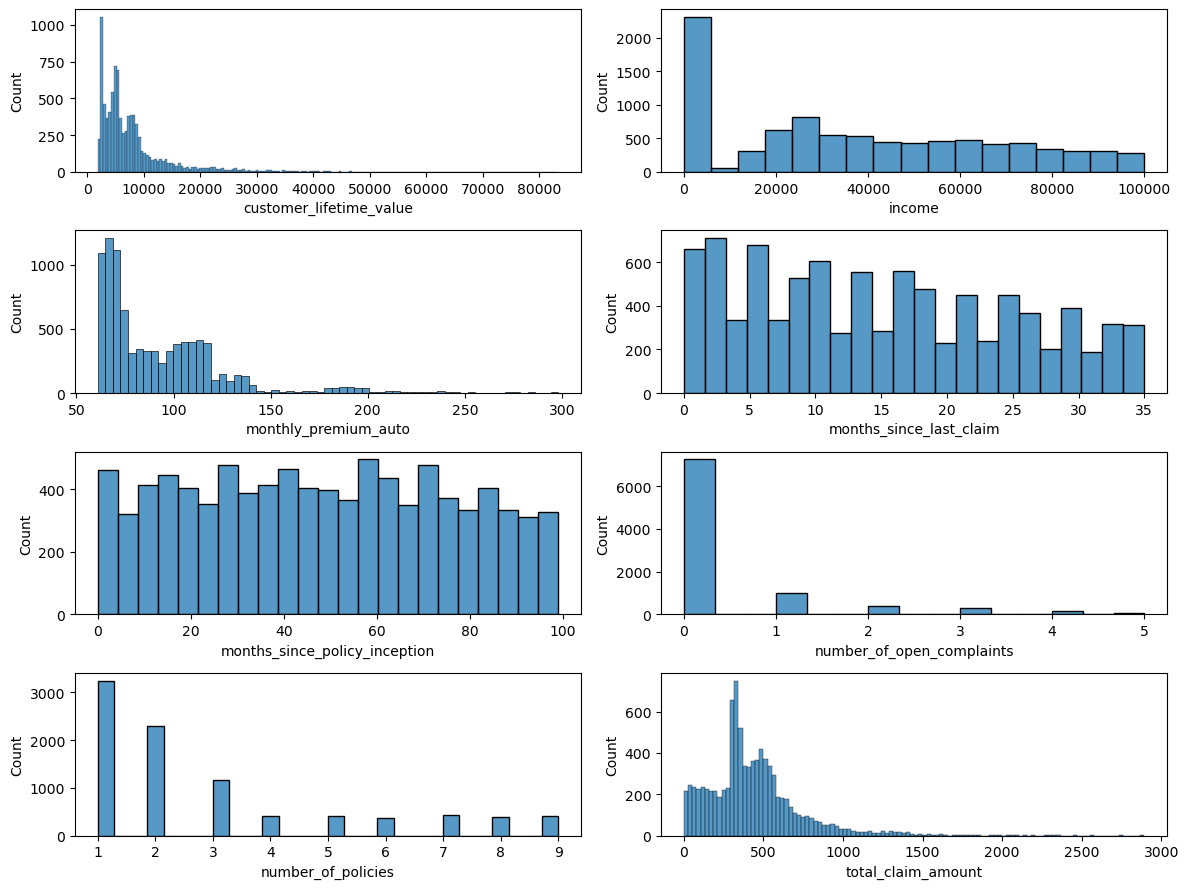

In [35]:
# Ploting with Seaborn library
fig, ax = plt.subplots(4,2,figsize=(12,9))
sns.histplot(data=mca_data, x="customer_lifetime_value", ax = ax[0,0])
sns.histplot(data=mca_data,x="income", ax = ax[0,1])
sns.histplot(data=mca_data, x="monthly_premium_auto", ax = ax[1,0])
sns.histplot(data=mca_data, x="months_since_last_claim", ax = ax[1,1])
sns.histplot(data=mca_data, x="months_since_policy_inception", ax = ax[2,0])
sns.histplot(data=mca_data, x="number_of_open_complaints", ax = ax[2,1])
sns.histplot(data=mca_data, x="number_of_policies", ax = ax[3,0])
sns.histplot(data=mca_data, x="total_claim_amount", ax = ax[3,1])
plt.tight_layout()
plt.show()

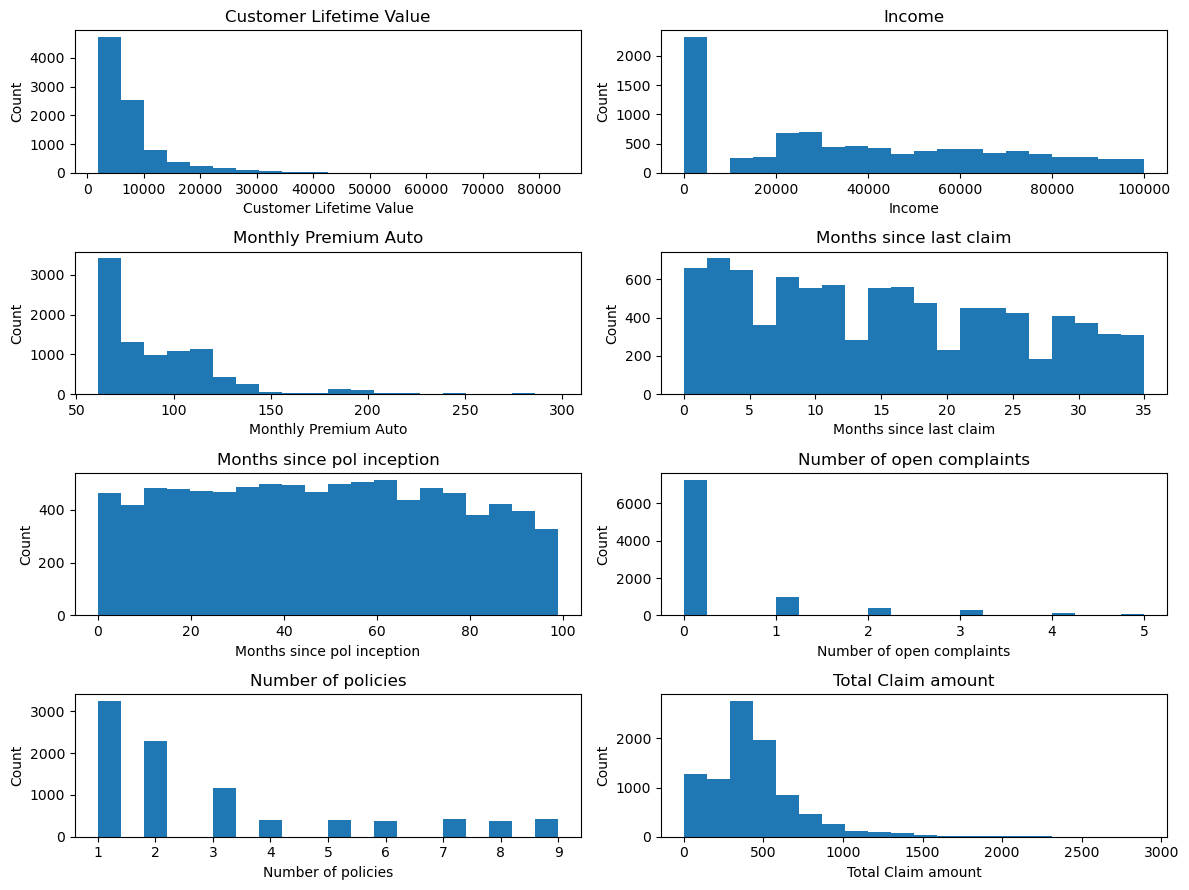

In [36]:
# Ploting with Matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

x1 = mca_data["customer_lifetime_value"]
x2 = mca_data["income"]

fig, ax = plt.subplots(4,2,figsize=(12,9))
ax[0,0].hist(numerical_columns["customer_lifetime_value"], bins=20)
ax[0,0].set_title('Customer Lifetime Value')
ax[0,0].set_xlabel('Customer Lifetime Value')
ax[0,0].set_ylabel('Count')
ax[0,1].hist(numerical_columns["income"], bins=20)
ax[0,1].set_title('Income')
ax[0,1].set_xlabel('Income')
ax[0,1].set_ylabel('Count')
ax[1,0].hist(numerical_columns["monthly_premium_auto"], bins=20)
ax[1,0].set_title('Monthly Premium Auto')
ax[1,0].set_xlabel('Monthly Premium Auto')
ax[1,0].set_ylabel('Count')
ax[1,1].hist(numerical_columns["months_since_last_claim"], bins=20)
ax[1,1].set_title('Months since last claim')
ax[1,1].set_xlabel('Months since last claim')
ax[1,1].set_ylabel('Count')
ax[2,0].hist(numerical_columns["months_since_policy_inception"], bins=20)
ax[2,0].set_title('Months since pol inception')
ax[2,0].set_xlabel('Months since pol inception')
ax[2,0].set_ylabel('Count')
ax[2,1].hist(numerical_columns["number_of_open_complaints"], bins=20)
ax[2,1].set_title('Number of open complaints')
ax[2,1].set_xlabel('Number of open complaints')
ax[2,1].set_ylabel('Count')
ax[3,0].hist(numerical_columns["number_of_policies"], bins=20)
ax[3,0].set_title('Number of policies')
ax[3,0].set_xlabel('Number of policies')
ax[3,0].set_ylabel('Count')
ax[3,1].hist(numerical_columns["total_claim_amount"], bins=20)
ax[3,1].set_title('Total Claim amount')
ax[3,1].set_xlabel('Total Claim amount')
ax[3,1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [37]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the 
# column total_claim_amount later as the target variable.

In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# renaming the column names, otherwise they don´t fit in one line:
numerical_columns1 = numerical_columns.rename(columns = {"customer_lifetime_value":"clv", "income":"income", "monthly_premium_auto":"mpa",
                                                        "months_since_last_claim": "mslc", "months_since_policy_inception":"mspi",
                                                        "number_of_open_complaints":"noc", "number_of_policies":"nop",
                                                        "total_claim_amount":"tca"})

correlations_matrix = round(numerical_columns1.corr(),2)

print(correlations_matrix)

         clv  income   mpa  mslc  mspi   noc   nop   tca
clv     1.00    0.02  0.40  0.01  0.01 -0.04  0.02  0.23
income  0.02    1.00 -0.02 -0.03 -0.00  0.01 -0.01 -0.36
mpa     0.40   -0.02  1.00  0.01  0.02 -0.01 -0.01  0.63
mslc    0.01   -0.03  0.01  1.00 -0.04  0.01  0.01  0.01
mspi    0.01   -0.00  0.02 -0.04  1.00 -0.00 -0.01  0.00
noc    -0.04    0.01 -0.01  0.01 -0.00  1.00  0.00 -0.01
nop     0.02   -0.01 -0.01  0.01 -0.01  0.00  1.00 -0.00
tca     0.23   -0.36  0.63  0.01  0.00 -0.01 -0.00  1.00


In [39]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features 
# that have a high correlation, then do not drop any features

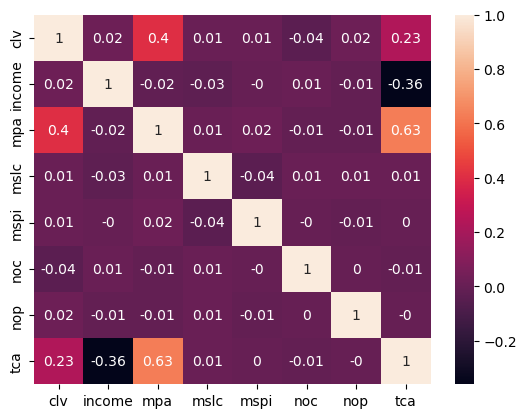

In [40]:
# The correlation matrix is in the previous task. Here is a seaborn heatmap.
# There are no variable with the strong multicolleniarity, therefore I will not drop any features.

correlations_matrix = round(numerical_columns1.corr(),2)
sns.heatmap(correlations_matrix, annot=True) #annot=True displays the correlation values
plt.show()

# Customer Analysis Round 5

In [41]:
# X-y split.
# Normalize (numerical).

In [42]:
y = numerical_columns["total_claim_amount"]
x = numerical_columns.drop(["total_claim_amount"], axis = 1)

In [43]:
# I select to use the MixMaxScaler to normalize the numerical x-variables to put all the values between [0,1]

In [44]:
transformer = MinMaxScaler().fit(x)
x_normalized = transformer.transform(x)
x_norm = pd.DataFrame(x_normalized)
print(x_normalized.shape)
pd.DataFrame(x_normalized, columns=x.columns).describe()

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.074999,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771
std,0.084382,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025744,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000
50%,0.047677,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000
75%,0.086754,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Here I am normalizing also a dependent y variable with a logarithmic transformation

# Customer Analysis Round 6

In [46]:
# One Hot/Label Encoding (categorical).
# Concat DataFrames
 # Linear Regression
# Train-test split.
# Apply linear regression.
 # Model Validation
# Description:
# R2.
# MSE.
# RMSE.
# MAE.

In [47]:
# Checking the list of categorical columns

In [48]:
categorical_columns.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

### Using OneHotEncoder to turn all the categorical values into columns

In [49]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoder = OneHotEncoder().fit(categorical_columns)
print(encoder.categories_)

encoded = encoder.transform(categorical_columns).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
onehot_encoded.head(20)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Concatenating everything together

In [50]:
X = pd.concat([onehot_encoded, pd.DataFrame(x_normalized, columns=x.columns)], axis =1)

In [51]:
#checking a concatenated df:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state_Arizona                   9134 non-null   float64
 1   state_California                9134 non-null   float64
 2   state_Nevada                    9134 non-null   float64
 3   state_Oregon                    9134 non-null   float64
 4   state_Washington                9134 non-null   float64
 5   response_No                     9134 non-null   float64
 6   response_Yes                    9134 non-null   float64
 7   coverage_Basic                  9134 non-null   float64
 8   coverage_Extended               9134 non-null   float64
 9   coverage_Premium                9134 non-null   float64
 10  education_Bachelor              9134 non-null   float64
 11  education_College               9134 non-null   float64
 12  education_Doctor                91

### Linear regression Train-Test split

In [52]:
X.shape

(9134, 64)

In [53]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total_claim_amount, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 64)
(1827, 64)
(7307,)
(1827,)


### Apply linear regression

In [56]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [57]:
y_pred = lm.predict(X_test)

In [58]:
# checking the model predictions on the train and test set. It performes sligtly better on the train set
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
print("R2 of a train set:", r2_score(y_train, y_pred_train))
y_pred_test = lm.predict(X_test)
print("R2 of a test set:", r2_score(y_test, y_pred_test))

R2 of a train set: 0.7791103062149196
R2 of a test set: 0.7474112316767907


### Model Validation

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

100.83237361521618


In [61]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

24462.398334089114


In [62]:
rmse = np.sqrt(mse)
print(rmse)

156.40459818716684


# Customer Analysis Round 7

### I will try to improve a linear regression model with using StandardScaler instead of MinMaxScaler

In [63]:
from sklearn.preprocessing import StandardScaler

Standardtransformer = StandardScaler()
Standardtransformer = StandardScaler().fit(x)
x_standardized = Standardtransformer.transform(x) # applies the transformation
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=x.columns)
x_standardized.head()

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


In [64]:
X1 = pd.concat([onehot_encoded, pd.DataFrame(x_standardized, columns=x.columns)], axis =1)

In [65]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=21)

In [66]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(7307, 64)
(1827, 64)
(7307,)
(1827,)


In [67]:
lm = linear_model.LinearRegression()
lm.fit(X_train1,y_train1)

LinearRegression()

In [68]:
y_pred1 = lm.predict(X_test1)

In [69]:
from sklearn.metrics import r2_score
y_pred_train1 = lm.predict(X_train1)
print("R2 of a train set:", r2_score(y_train, y_pred_train1))
y_pred_test1 = lm.predict(X_test1)
print("R2 of a test set:", r2_score(y_test, y_pred_test1))

R2 of a train set: -0.7707141830634512
R2 of a test set: -0.7271812598039182


In [ ]:
# The results did not appear to be better

### Now I will try to remove the outliers from some of the numeric variables

In [ ]:
# I have to come back to the original dataser mca_data anf create a copy with which I will work:

In [70]:
mca_data_copy = mca_data.copy(deep=True)

In [ ]:
# Now I will create box plots for numerical variable to see which once have outliers:

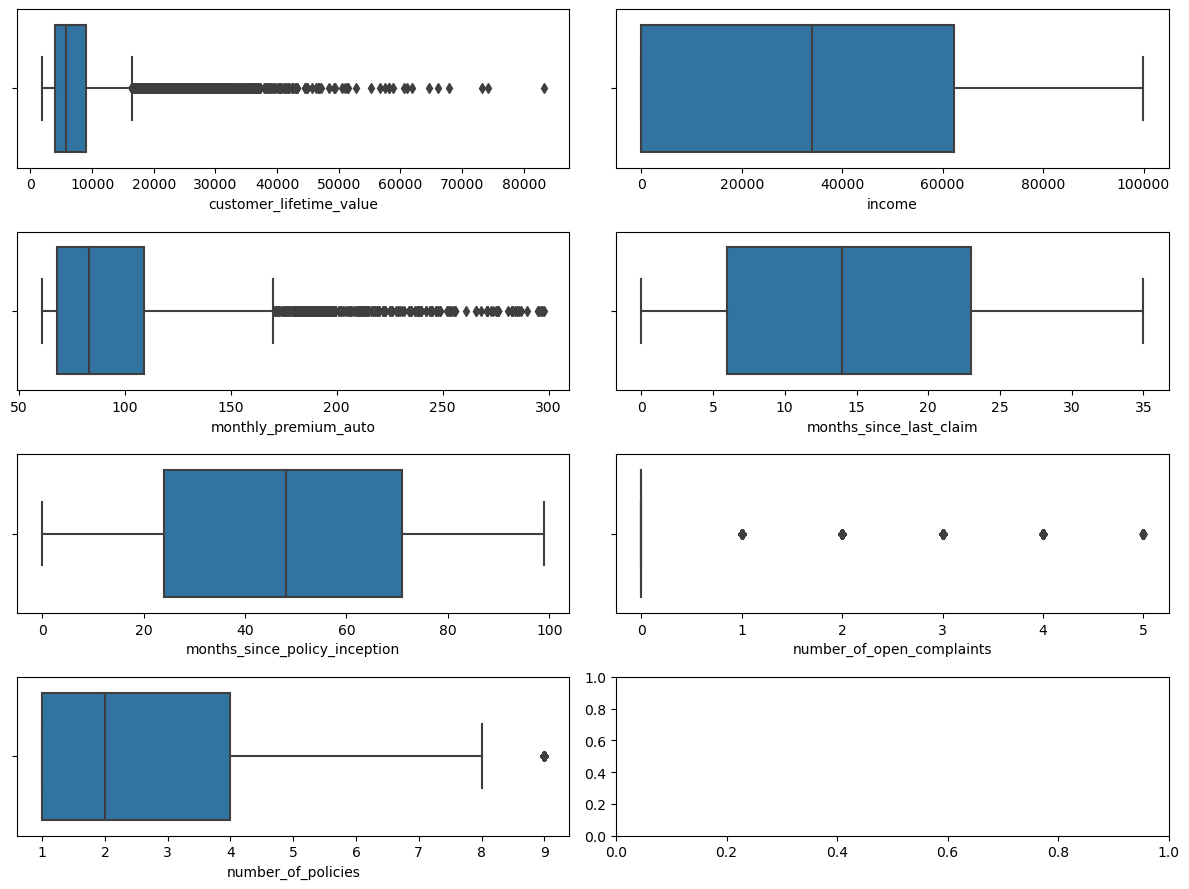

In [71]:
#Checking for outliers in dependent numerical variables
fig, ax = plt.subplots(4,2,figsize=(12,9))
sns.boxplot(data=mca_data_copy, x="customer_lifetime_value", ax = ax[0,0])
sns.boxplot(data=mca_data_copy,x="income", ax = ax[0,1])
sns.boxplot(data=mca_data_copy, x="monthly_premium_auto", ax = ax[1,0])
sns.boxplot(data=mca_data_copy, x="months_since_last_claim", ax = ax[1,1])
sns.boxplot(data=mca_data_copy, x="months_since_policy_inception", ax = ax[2,0])
sns.boxplot(data=mca_data_copy, x="number_of_open_complaints", ax = ax[2,1])
sns.boxplot(data=mca_data_copy, x="number_of_policies", ax = ax[3,0])
plt.tight_layout()
plt.show()

In [ ]:
# "customer lifetime value" and "monthly premium auto" have many outliers. We can check if these are the same guys with a scatterplot:

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='customer_lifetime_value'>

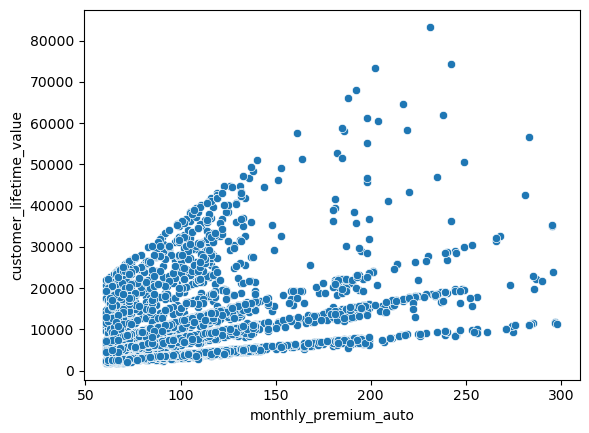

In [73]:
sns.scatterplot(data = mca_data_copy, y='customer_lifetime_value', x='monthly_premium_auto')

In [ ]:
# I am not sure how to interpret this scatterplot therefore,
# I will remove the outliers from "customer_lifetime_value" and "monthly_premium_auto" column after column
# First removing the outlier from "customer lifetime velue"

In [83]:
iqr = np.percentile(mca_data_copy['customer_lifetime_value'],75) - np.percentile(mca_data_copy['customer_lifetime_value'],25)
upper_wisker = np.percentile(mca_data_copy['customer_lifetime_value'],75) + 1.5*iqr
lower_wisker = np.percentile(mca_data_copy['customer_lifetime_value'],25) - 1.5*iqr

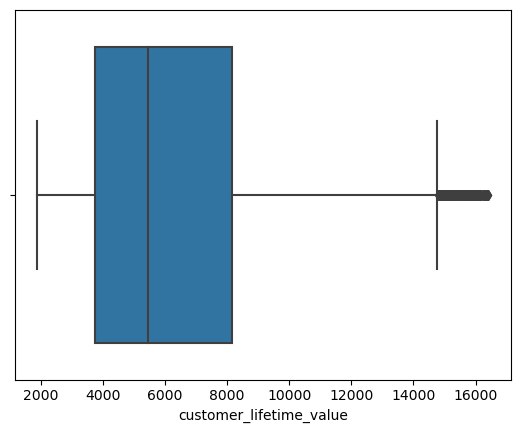

In [84]:
mca_data_copy1 = mca_data_copy[(mca_data_copy['customer_lifetime_value']>lower_wisker) & (mca_data_copy['customer_lifetime_value']<upper_wisker)]
sns.boxplot(x=mca_data_copy1['customer_lifetime_value'])
plt.show()

In [ ]:
# Second, removing the outlier from the "monthly premium auto":

In [78]:
iqr = np.percentile(mca_data_copy1['monthly_premium_auto'],75) - np.percentile(mca_data_copy1['monthly_premium_auto'],25)
upper_wisker1 = np.percentile(mca_data_copy1['monthly_premium_auto'],75) + 1.5*iqr
lower_wisker1 = np.percentile(mca_data_copy1['monthly_premium_auto'],25) - 1.5*iqr

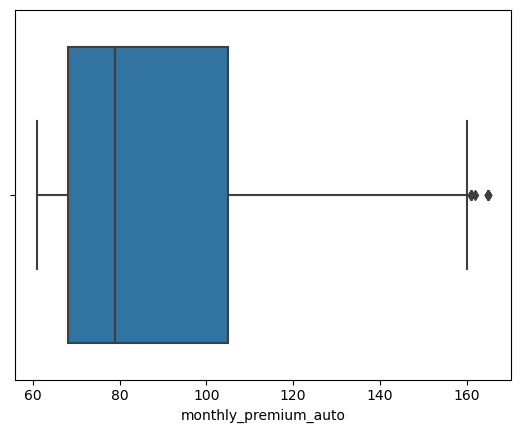

In [80]:
mca_data_copy2 = mca_data_copy1[(mca_data_copy1['monthly_premium_auto']>lower_wisker1) & (mca_data_copy1['monthly_premium_auto']<upper_wisker1)]
sns.boxplot(x=mca_data_copy2['monthly_premium_auto'])
plt.show()

In [ ]:
# Now I will make a split, use MinMaxScaler on numericals, encode categoricals, create a regression model and train it:

In [85]:
numerical_columns2 = mca_data_copy2.select_dtypes(include = np.number)
categorical_columns2 = mca_data_copy2.select_dtypes(include = "object").drop(["customer"], axis=1)

In [88]:
y2 = numerical_columns2["total_claim_amount"]
x2 = numerical_columns2.drop(["total_claim_amount"], axis = 1)

In [90]:
transformer2 = MinMaxScaler().fit(x2)
x_normalized2 = transformer2.transform(x2)
x_norm2 = pd.DataFrame(x_normalized2)
print(x_normalized2.shape)
pd.DataFrame(x_normalized2, columns=x2.columns).describe()

(8016, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000
mean,0.290932,0.376891,0.248489,0.429227,0.484603,0.078194,0.255910
std,0.215303,0.304760,0.215236,0.286283,0.282217,0.185093,0.308442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.121642,0.000000,0.067308,0.171429,0.242424,0.000000,0.000000
50%,0.238459,0.338139,0.173077,0.400000,0.484848,0.000000,0.125000
75%,0.423526,0.623869,0.423077,0.657143,0.717172,0.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
encoder2 = OneHotEncoder(drop='first')
encoder2 = OneHotEncoder().fit(categorical_columns2)
print(encoder.categories_)

encoded2 = encoder2.transform(categorical_columns2).toarray()
print(encoded2)
onehot_encoded2 = pd.DataFrame(encoded2,columns=encoder2.get_feature_names_out())
onehot_encoded2.head()

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
X2_new = pd.concat([onehot_encoded2, pd.DataFrame(x_normalized2, columns=x2.columns)], axis =1)

In [99]:
X2_new.shape

(8016, 62)

In [100]:
from sklearn.model_selection import train_test_split
X2_new_train, X2_new_test, y2_train, y2_test = train_test_split(X2_new, y2, test_size=0.2, random_state=29)

In [101]:
print(X2_new_train.shape)
print(X2_new_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(6412, 62)
(1604, 62)
(6412,)
(1604,)


In [102]:
lm_new2 = linear_model.LinearRegression()
lm_new2.fit(X2_new_train,y2_train)

LinearRegression()

In [103]:
y2_pred = lm_new2.predict(X2_new_test)

In [104]:
from sklearn.metrics import r2_score
y2_pred_train = lm_new2.predict(X2_new_train)
print("R2 of a train set:", r2_score(y2_train, y2_pred_train))
y2_pred_test = lm_new2.predict(X2_new_test)
print("R2 of a test set:", r2_score(y2_test, y2_pred_test))

R2 of a train set: 0.7468008485448413
R2 of a test set: 0.7485565350685975


In [ ]:
#These results are even lower than in previous 2 cases. Therefore outliers were not worsening the model.